In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime
import seaborn as sns
import matplotlib

### Config

In [2]:
folder_path = "speedups.csv"
data_dict = {}

### Load Data

In [3]:
df = pd.read_csv(folder_path, header=None, names=['name', 'value'])

for _, row in df.iterrows():
    match = re.match(r"([^-]+)-([^.]+).raw", row['name'])
    if match:
        category, test = match.groups()
        value = row['value']
        value = value.strip()
        t = datetime.strptime(value,'%Mm%S.%fs') 
        total_seconds = t.minute * 60 + t.second + t.microsecond/1000000

        if test not in data_dict:
            data_dict[test] = {}
        data_dict[test][category] = total_seconds

speedups_table = pd.DataFrame(data_dict).T

In [4]:
speedups_table

,blackscholes,canneal,dedup,ferret,freqmine,radix,vips
1,0.826,8.554,21.040,3.395,6.193,58.135,103.852
2,0.489,7.798,18.105,3.132,5.686,39.252,53.069
4,0.318,7.035,10.170,1.572,2.256,14.870,28.525
8,0.255,7.124,16.538,1.600,1.727,9.942,23.647


In [5]:
### Normalize data with respect to 1 Thread
normalized_speedups = speedups_table.iloc[0].div(speedups_table)

In [6]:
normalized_speedups

,blackscholes,canneal,dedup,ferret,freqmine,radix,vips
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.689162,1.096948,1.162110,1.083972,1.089166,1.481071,1.956924
4,2.597484,1.215920,2.068830,2.159669,2.745124,3.909549,3.640736
8,3.239216,1.200730,1.272222,2.121875,3.585987,5.847415,4.391762


### Plot 2b

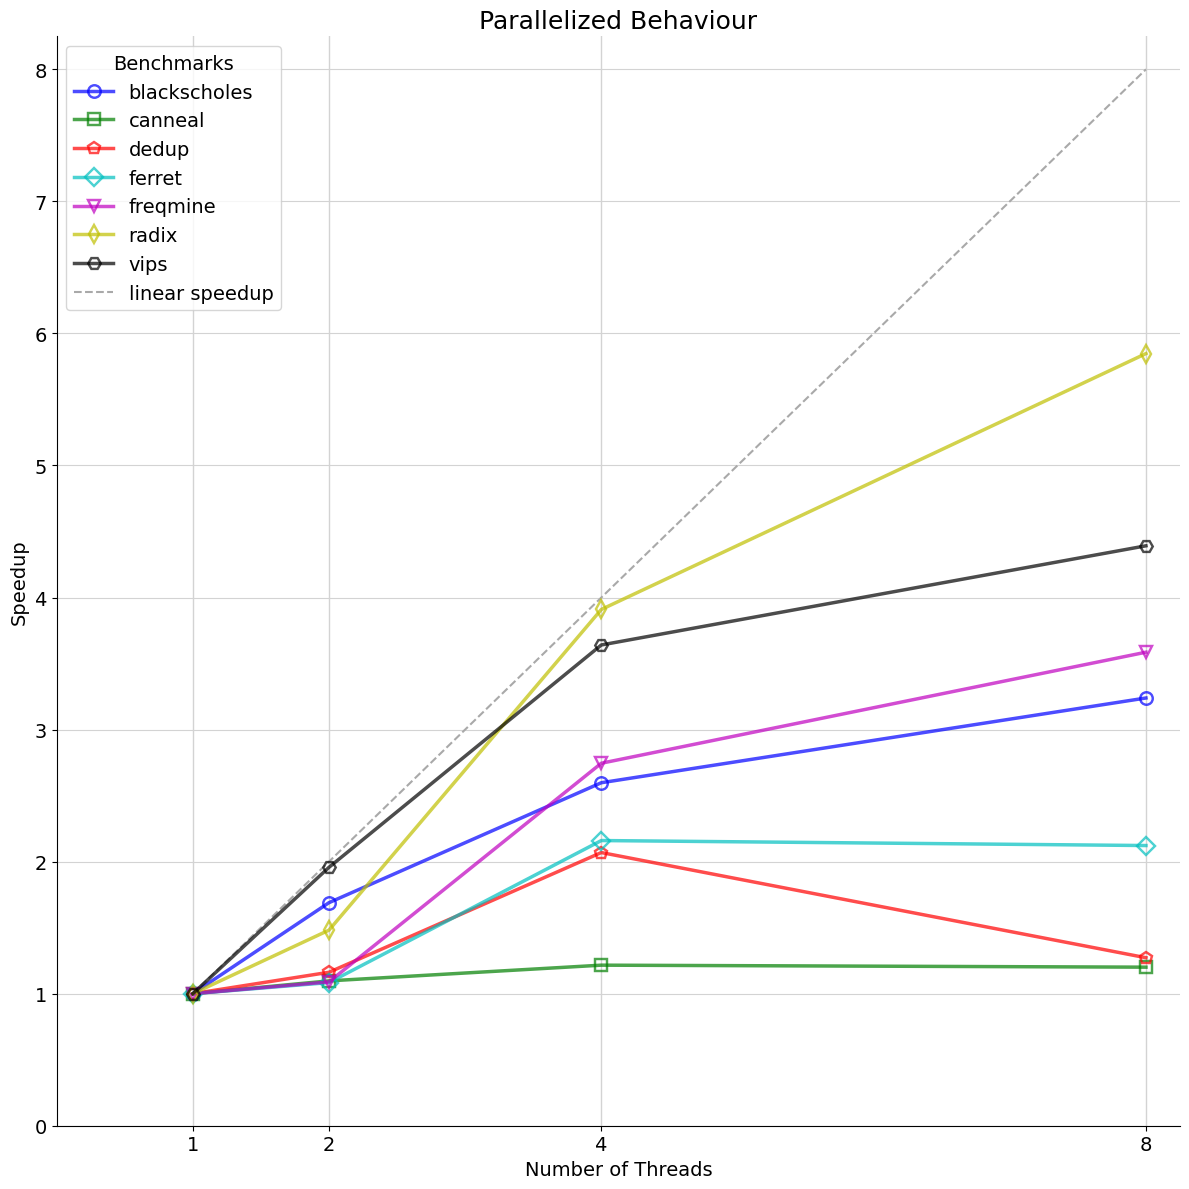

In [7]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 12))
markers = ['o', 's', 'p', 'D', 'v', 'd', 'H']
colors = [
    '#0000ff',  # blue
    '#007f00',  # green
    '#ff0000',  # red
    '#00bfbf',  # light blue
    '#bf00bf',  # pink
    '#bfbf00',  # ocra
    '#000000'   # black
]
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
x_pos = [1, 2, 4, 8]

for position in x_pos:
    ax.axvline(position, color='lightgray', linewidth=1)
    
ax.yaxis.grid(True, color='lightgray')

y_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8']
ax.set_yticks(range(0, 9, 1), y_labels)

ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)

# Linear speedup line
linear_speedup = ax.plot([1, 8], [1, 8], color='darkgrey', linestyle='--', label='linear speedup')[0]

i = 0
for column in normalized_speedups.columns:
    ax.errorbar(list(map(int, normalized_speedups.index)), normalized_speedups[column], marker=markers[i], color=colors[i],
                 markersize=9, markeredgewidth=1.75, markerfacecolor='none', label=column, alpha=0.7, linewidth=2.5)
    i += 1

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_xlim(0, 8.25)
ax.set_ylim(0, 8.25)
ax.set_xlabel('Number of Threads', fontsize=14)
ax.set_ylabel('Speedup', fontsize=14)
ax.set_title('Parallelized Behaviour', fontsize=18)

handles, labels = plt.gca().get_legend_handles_labels()
handles.extend([linear_speedup])
ax.legend(handles=handles[1:], title='Benchmarks', fontsize=14, title_fontsize=14)

fig.tight_layout()

if True:
    plt.show()
else:
    matplotlib.use("pgf")
    plt.rc("pgf", texsystem="pdflatex", rcfonts=False)
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        # Use LaTeX default serif font.
        "font.serif": [],
    })
    plt.savefig("plots/plot2b_CCA_guidelines.pgf", bbox_inches="tight", backend='pgf')
    print('done')
